### Data Regresion Multiple
La tarea implica cargar el archivo `data_regression.csv` y fittear un modelo lineal simple usando cada variable $X$ primero, y después un modelo linear múltiple usando $X1$, $X2$ y $X3$ al mismo tiempo.

1- ¿Qué diferencias existe entre la relación de cada variable de input con el output ($y$)? 

2- ¿Cómo es la correlación entre las variables regresoras y el output?

3- ¿Qué pueden notar cuando realizan la regresión múltiple?¿Los resultados difieren de lo anterior?

4- Calcule las medidas MSE y Coeficiente R2 para evaluar cada modelo.

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Carga y exploracion de datos

In [195]:
data = pd.read_csv('../Clase 01/data_regression.csv')

In [196]:
data= data.drop(['Unnamed: 0'],axis=1)

In [197]:
data.head(3)

,X1,X2,X3,y
0,-10.000000,0.000000,-5.000000,10.958481
1,-9.986658,0.014676,-4.996664,8.991666
2,-9.973316,0.029353,-4.993329,10.398068


In [198]:
data.shape

(1500, 4)

In [199]:
data.describe()

,X1,X2,X3,y
count,1.500000e+03,1500.000000,1500.00000,1500.000000
mean,-2.522427e-16,11.000000,-2.50000,5.488195
std,5.779280e+00,6.357208,1.44482,2.774988
min,-1.000000e+01,0.000000,-5.00000,-1.376528
25%,-5.000000e+00,5.500000,-3.75000,3.316724
50%,0.000000e+00,11.000000,-2.50000,5.375487
75%,5.000000e+00,16.500000,-1.25000,7.687168
max,1.000000e+01,22.000000,0.00000,12.015926


### *Modelo de regresion lineal simple de X1*

In [200]:

n= data.shape[0]
X1=data['X1'].values.reshape(-1,1)
y1_real= data['y']
y1= data['y']+ np.random.randn(n)


In [201]:
print(X1.shape)

(1500, 1)


In [202]:
print(y1_real.shape)

(1500,)


Grafica de los valores reales

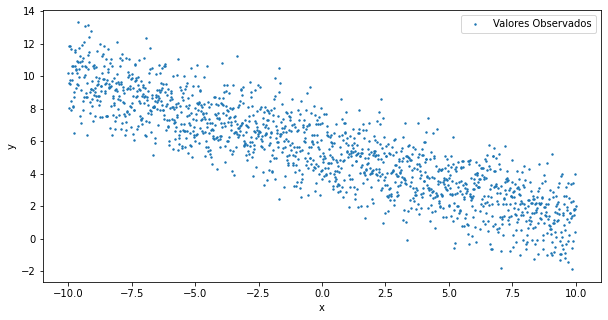

In [203]:
plt.figure(figsize=(10,5))
plt.scatter(X1,y1, s = 2, label= 'Valores Observados')
# plt.plot(X1, y1_real, '--',label ='Curva Teórica', c = 'r')  # No tenemos una ecuacion
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [204]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

modelo_lineal = LinearRegression()

from sklearn.model_selection import train_test_split

# X1 = X1.reshape(-1,1) # X.shape da (1500,1)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y1_real, test_size=0.30, random_state=42)

print(X1_train.shape, y_train.shape, X1_test.shape, y_test.shape)

(1050, 1) (1050,) (450, 1) (450,)


In [205]:
# Entrenamos el modelo solo con los datos de entrenamiento

modelo_lineal.fit(X1_train, y_train)

LinearRegression()

In [206]:
# Aquí observamos cómo el modelo ha aprendido de los datos, a partir de la pendiente y 
#la ordenada al origen que calculó

print('La pendiente es :', modelo_lineal.coef_)
print('La ordenada al origen es:', modelo_lineal.intercept_)

La pendiente es : [-0.44618404]
La ordenada al origen es: 5.489769168575827


In [207]:
# Predecimos
y_train_pred = modelo_lineal.predict(X1_train) # subset de entrenamiento. Deberia dar igual a y_train
y_test_pred = modelo_lineal.predict(X1_test) #subset de testeo

In [208]:
df_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
df_train.head()

,Actual,Predicted
485,7.846704,7.064361
527,6.830511,6.814332
199,9.193092,8.766945
889,4.565765,4.659313
844,5.008155,4.927202


In [209]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_test.head()

,Actual,Predicted
1116,5.004917,3.307962
1368,2.328681,1.807784
422,7.491922,7.439406
413,5.546576,7.492984
451,6.638106,7.266766


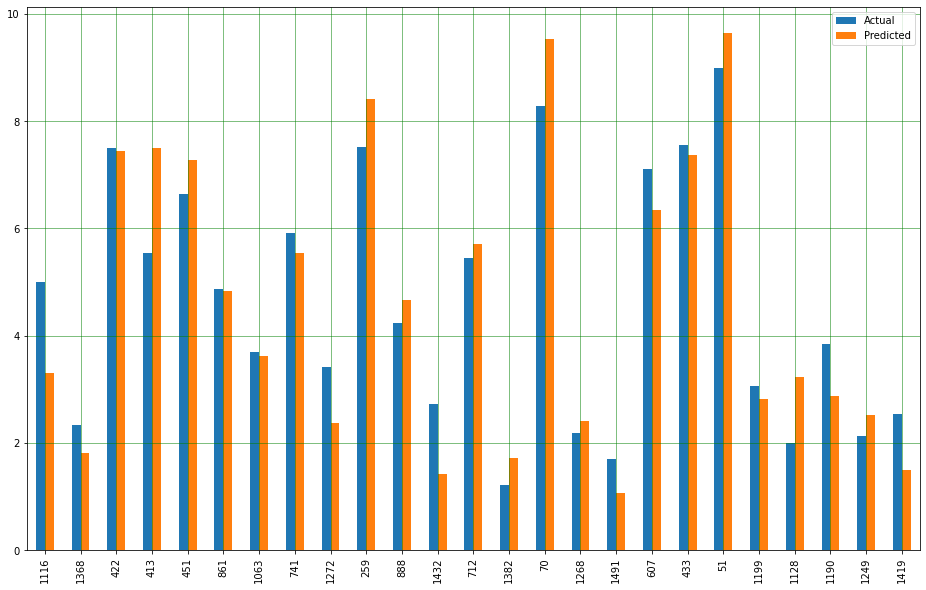

In [210]:
df1 = df_test.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

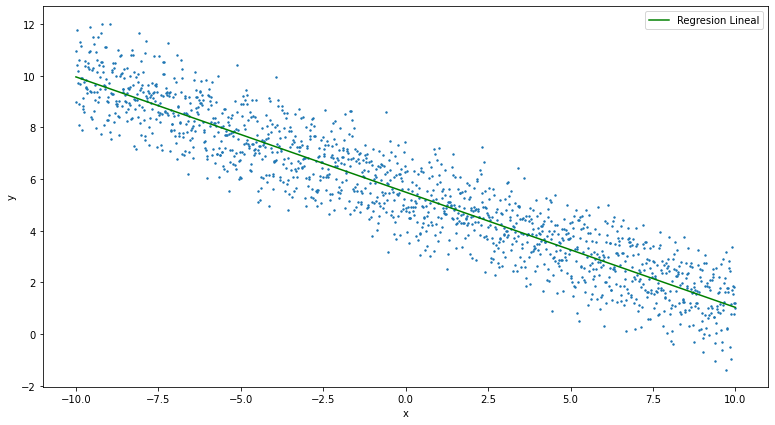

In [211]:
# Curva que calculo este regresor
plt.figure(figsize = (13,7))

plt.scatter(X1,y1_real, s = 2) # ptos con ruido
# plt.plot(X1, y1_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X1,modelo_lineal.predict(X1),label ='Regresion Lineal', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

Raíz del error cuadrático medio en Train: 1.0095738708684368 alejado de la realidad
Raíz del error cuadrático medio en Test: 0.9783822079959493 alejado de la realidad


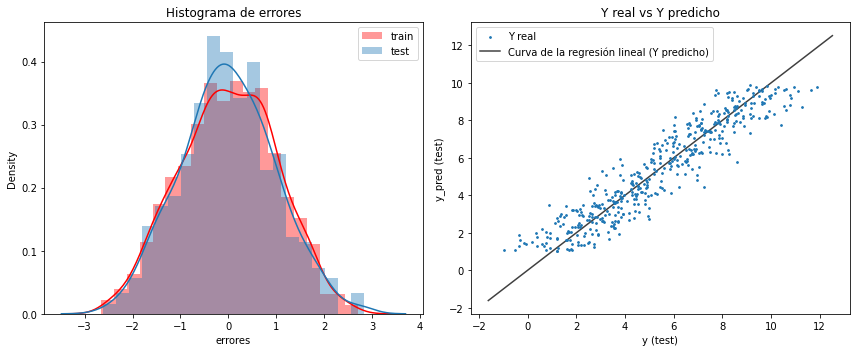

In [212]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error 


import seaborn as sns


rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False))
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train} alejado de la realidad')
print(f'Raíz del error cuadrático medio en Test: {rmse_test} alejado de la realidad')
# Viendolo en el subplot 1 es una distancia chiquita

plt.figure(figsize = (12,5))

# En este subplot, graficamos los histogramas de los errores para el subset de entrenamiento y el de testeo
plt.subplot(1,2,1)
plt.title('Histograma de errores')
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train', color = 'r', kde = True)
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test', kde = True)
plt.xlabel('errores')
plt.legend()

# En este subplot, graficamos los puntos celestes que representan los valores Y reales 
# y la curva en negro que representa la función de regresión lineal que creó nuestro modelo de ML
ax = plt.subplot(1,2,2)
plt.title('Y real vs Y predicho')
ax.scatter(y_test,y_test_pred, s =3, label = 'Y real')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Curva de la regresión lineal (Y predicho)')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.legend()
plt.tight_layout()
plt.show()

In [213]:
from sklearn.metrics import r2_score 

r2 = r2_score(y_test, y_test_pred) 
print('El coeficiente de determinación del regresor es:', r2)
# Mientras mas cerca del 1 mejor, no es un porcentaje

El coeficiente de determinación del regresor es: 0.8748049364266249


### *Modelo de regresion lineal multiple X1,X2,X3*

In [214]:
n= data.shape[0]
X1=data['X1']
X2=data['X2']
X3=data['X3']
X= np.array(X1 + X2 + X3)
y_real= data['y']
y= data['y']+ np.random.randn(n)

In [215]:
X.shape
y_real.shape

(1500,)

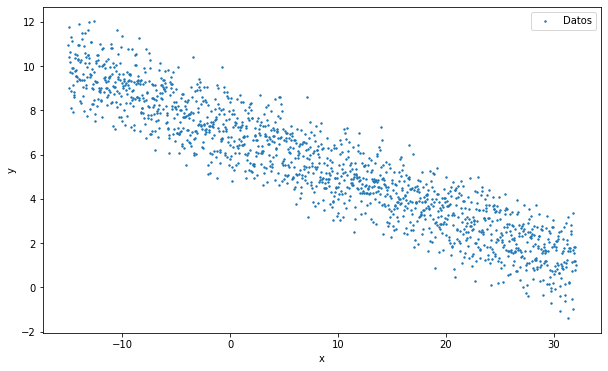

In [216]:
# Graficamos los datos y la curva teórica

plt.figure(figsize= (10,6))
plt.scatter(X,y_real, s = 2, label = 'Datos')
# plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [217]:
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1125, 1) (1125,) (375, 1) (375,)


In [218]:
# Primero instanciaremos un modelo básico de relación lineal para poder compararlo, posteriormente, con una regresión lineal con atributos polinómicos

from sklearn.linear_model import LinearRegression
reg_1 = LinearRegression()

In [219]:
from sklearn.preprocessing import PolynomialFeatures

In [220]:
poly = PolynomialFeatures(3, include_bias=False)

#Entrenamos y transformamos los atributos para poder obtener un grado 4

X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)
print(X_train_new.shape, X_test_new.shape)

(1125, 3) (375, 3)


In [221]:
# Instanciamos un nuevo modelo de regresión lineal, pero ahora tendrá los atributos polinómicos que definimos en la celda anterior
reg_2 = LinearRegression()

# Entrenamos la regresión con los atributos X polinómicos
reg_2.fit(X_train_new, y_train)

# Predecimos
y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)

In [222]:
print('Las pendientes del modelo de regresión lineal son:', reg_2.coef_)
print('La ordenada al origen del modelo de regresión lineal es:', reg_2.intercept_)

Las pendientes del modelo de regresión lineal son: [-1.94544194e-01  1.17898104e-04  1.44519428e-06]
La ordenada al origen del modelo de regresión lineal es: 7.106406311402724


In [223]:
print(round(-1.98474521e-01, 5))
print(round(3.39661713e-04, 5))
print(round(5.60270085e-08, 7))

-0.19847
0.00034
1e-07


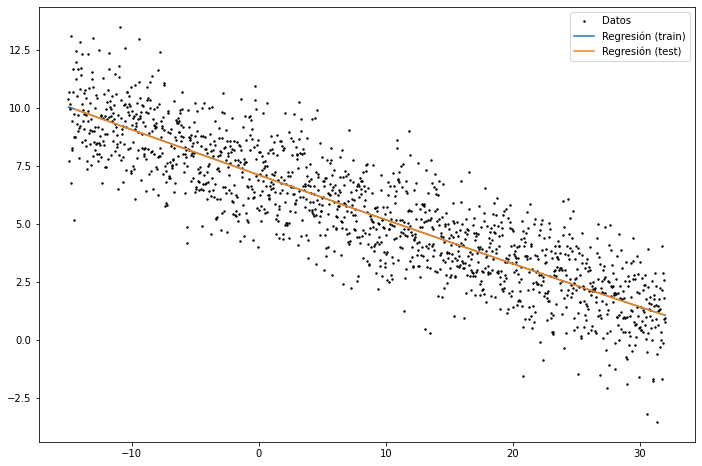

In [224]:
plt.figure(figsize = (40,8))
plt.subplot(1,3,1)
plt.scatter(X,y, s = 2, label = 'Datos', color = 'black')
# plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')

list1, list2 = zip(*sorted(zip(X_train_new[:,0], y_train_pred_2)))
plt.plot(list1, list2,label ='Regresión (train)')

list1, list2 = zip(*sorted(zip(X_test_new[:,0], y_test_pred_2)))
plt.plot(list1, list2,label = 'Regresión (test)')
plt.legend()
plt.show()

Raíz del error cuadrático medio en Train: 1.454188355082581
Raíz del error cuadrático medio en Test: 1.3161026585976134


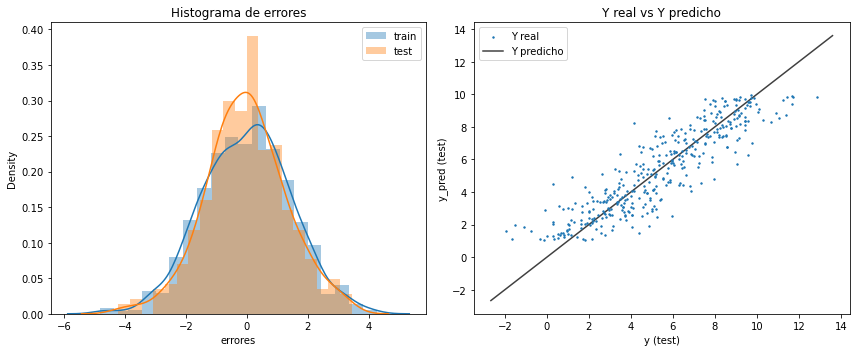

In [225]:
from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_2))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_2))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.title('Histograma de errores')
sns.distplot(y_train - y_train_pred_2, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_2, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
plt.title('Y real vs Y predicho')
ax.scatter(y_test,y_test_pred_2, s =2, label = 'Y real')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Y predicho')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.legend()
plt.tight_layout()
plt.show()

In [226]:
from sklearn.metrics import r2_score 

r2 = r2_score(y_test, y_test_pred_2) 
print('El coeficiente de determinación del regresor es:', r2)
# Mientras mas cerca del 1 mejor, no es un porcentaje

El coeficiente de determinación del regresor es: 0.7935283297443188
